# Clase 2 - Dinámica Temporal

**2do Cuatrimestre 2020**

**DF - FCEyN - UBA**

En este Notebook vamos adquirir herramientas de sistemas dinamicos para analizar señales temporales.

## 1) Embeddings

Como vierone en la teórica, una herramienta fundamental para estudiar series temporales son los `embeddings`. 



### 1.1) Oscilador lineal

Vamos a comenzar un un caso sencillo. Definamos un sistema cuya solución sea:

$x(t) = sin(\omega t)$

In [49]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt


#Frecuencia de oscilacion (oscilaciones por unidad de tiempo)
f = 2

w = 2*np.pi*f

def campo_vector(z, t):
    # Como ahora las variables vienen en una lista (en el primer argumento: z)
    # primero las separamos para que sea más claro
    x = z[0]
    y = z[1]
    # Y ahora calculamos las derivadas
    dxdt = y
    dydt = -w*w*x
    return [dxdt, dydt]

Integremos las ecuaciones

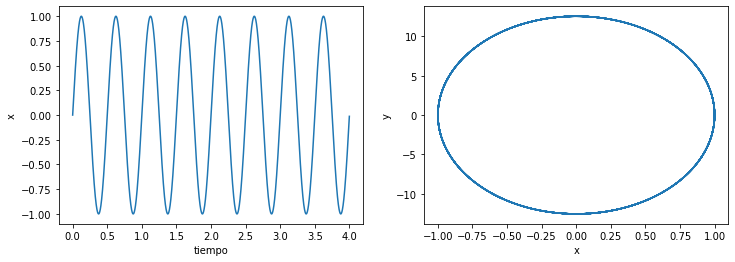

In [2]:
from scipy.integrate import odeint

dt = 0.001
t = np.arange(0, 4, dt)

# Ponemos condiciones iniciales
xi = 0
yi = 4*np.pi

# Y nos armamos una lista que contiene ci de cada variable
zi = [xi, yi]

# Llamamos al odeint y vean que le pasamos la lista de condiciones iniciales
sol = odeint(campo_vector, zi, t)
x = sol[:,0]
y = sol[:,1]

# Vean como nos viene la solución:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(t,x)
plt.xlabel('tiempo')
plt.ylabel('x')
plt.subplot(122)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Vamos a reconstruir el espacio de fases a partir de un embedding con retrasos temporales:

$[x_{emb},y_{emb}]  = [ x(n), x(n+T)]$


In [9]:
#Reconstruimos el espacio de fases
#Damos el paso del retraso temporal tau
#tau= 0.5 # = periodo, da recta con pendiente 1 
#tau=0.25 # = medio periodo da recta con pendiente -1
tau = 0.125 # da perfecto, es 1/4 del periodo
# tau= 0.125 + 0.5 da igual que 0.125

#En terminos de numero de puntos:
T = int(tau/dt)
print("El periodo del sistema es:"+str(1/f)+"s")
print("El retraso temporal utilizado es:"+str(tau)+"s")
print("El retraso en número de puntos es:", T)

#Hacemos el embedding de dimension 2:
#Definimos las listas donde guardamos la componente x e y del embedding
x_emb = []
y_emb = []

for k in range(len(x)-T):
  x_emb.append( x[k] )
  y_emb.append( x[k+T] )

El periodo del sistema es:0.5s
El retraso temporal utilizado es:0.125s
El retraso en número de puntos es: 125


Graficamos para ver nuestra reconstrucción del espacio de fases y comparamos con el espacio de fases original: $[x(t), \frac{dx}{dt}(t)]$.

Text(0, 0.5, '$x(n+T)$')

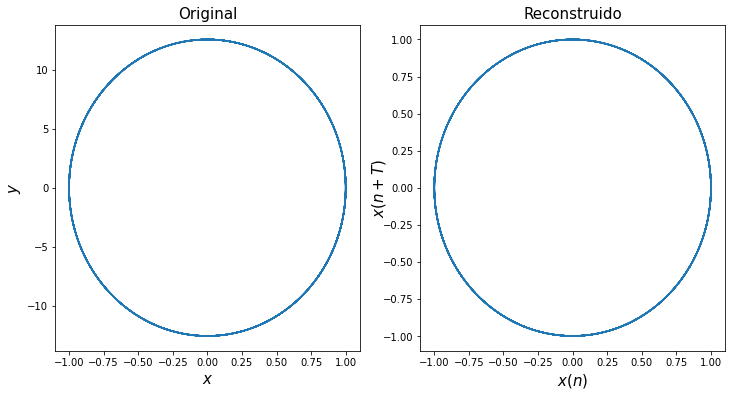

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title("Original", fontsize=15)
plt.plot(x, y)
plt.xlabel(r"$x$", fontsize=15)
plt.ylabel(r"$y$", fontsize=15)

plt.subplot(122)
plt.title("Reconstruido", fontsize=15)
plt.plot(x_emb, y_emb)
plt.xlabel(r"$x(n)$", fontsize=15)
plt.ylabel(r"$x(n+T)$", fontsize=15, labelpad=-5)

¿Les parece un buen valor de tau el elegido? ¿Por qué?

**Ejercicio:** Explore distintos valores de retraso temporal T. Compare el retraso temporal utilizado con un tiempo característico del problema.

**Reflexionar:** El teorema de Takens nos asegura que en el caso de una solucion que esta en un ciclo límite (un manifold de dimensión 1), se podrá obtener un embeding adecuado con utilizando una dimensión de embedding igual o superior a 3. En este caso, la dimensión de embedding que utilizamos fue 2. ¿Les parece que resultó adecuada? ¿Por qué?

Hicimos algo mejor que Tackens. Hicimos el embedding en dimemension 2 y Tackens nos garantiza que puedo hacerlo desde dimension 3 o superior. Gonza: el tau a veces es la diferencia entre hacer bien o mal un embedding. En este sistema el tau tmb tiene la misma periodicidad, poner tau  y tau+periodo es lo mismo. 



### 1.2) Otra señal periódica

**Ejercicio:** 
Suponga que ahora tiene una señal temporal parametrizada por la función:

$x(t) = sin(\omega t) + \frac{3}{4} sin(\frac{\omega}{2}t)$

Realice un embedding de dimensión 2. Explore distintos valores de retraso temporal. Compare los retrasos temporales utilizados con escalas temporales del problema.

Vuelva a preguntarse para este ejemplo: ¿Es esta una dimensión de embedding adecuada? ¿Podríamos decir que esto corresponde a un espacio de fases? Proponga un mecanismo para encontrar un embedding adecuado de la señal y grafiquelo.

**x(t) es una senial periodica y tiene el periodo de la frecuencia mas chica. Aca tengo f y f/2, el periodo de la senial es 1/(f/2)=2/f**

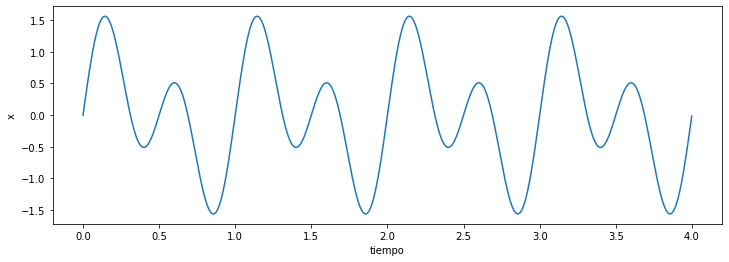

In [145]:
#Frecuencia de oscilacion (oscilaciones por unidad de tiempo)
f = 2

w = 2*np.pi*f

dt = 0.001
t = np.arange(0, 4, dt)

def x(t):
  return np.sin(w*t)+3*np.sin(w*t/2)/4

x=x(t)
# Vean como nos viene la solución:
plt.figure(figsize=(12,4))
plt.plot(t,x)
plt.xlabel('tiempo')
plt.ylabel('x')
plt.show()

In [61]:
#Reconstruimos el espacio de fases
#Damos el paso del retraso temporal tau
#tau= 1 # = periodo, da recta con pendiente 1 
#tau=0.5 # = medio periodo, da algo que se interseca
#tau=1+ 0.5 # da lo mismo que 0.5, esta bien, le sume un periodo
#tau = 0.25 # da perfecto, no se interseca. Es el periodo/4
tau= 0.2 # da perfecto, no se interseca, es el periodo/5

#En terminos de numero de puntos:
T = int(tau/dt)
print("El periodo del sistema es:"+str(1/(f/2))+"s")
print("El retraso temporal utilizado es:"+str(tau)+"s")
print("El retraso en número de puntos es:", T)

#Hacemos el embedding de dimension 2:
#Definimos las listas donde guardamos la componente x e y del embedding
x_emb = []
y_emb = []

for k in range(len(x)-T):
  x_emb.append( x[k] )
  y_emb.append( x[k+T] )

El periodo del sistema es:1.0s
El retraso temporal utilizado es:0.2s
El retraso en número de puntos es: 200


Text(0, 0.5, '$x(n+T)$')

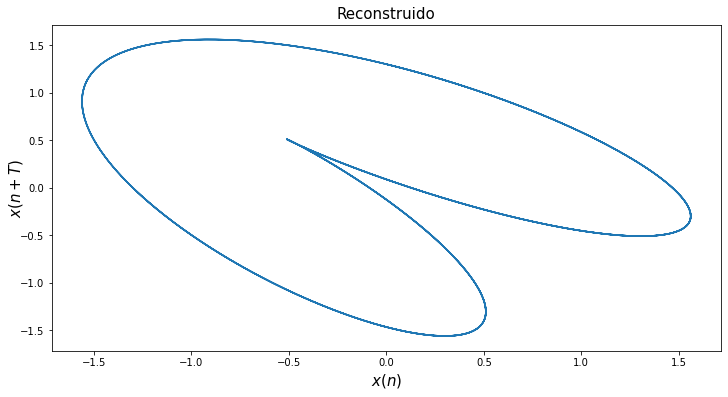

In [62]:
plt.figure(figsize=(12,6))
plt.title("Reconstruido", fontsize=15)
plt.plot(x_emb, y_emb)
plt.xlabel(r"$x(n)$", fontsize=15)
plt.ylabel(r"$x(n+T)$", fontsize=15, labelpad=-5)

## **Hago un embedding en 3D**

In [146]:
#Reconstruimos el espacio de fases
#Damos el paso del retraso temporal tau
#tau= 1 # = periodo, da recta con pendiente 1 
#tau=0.5 # = medio periodo, da algo que se interseca
#tau=1+ 0.5 # da lo mismo que 0.5, esta bien, le sume un periodo
#tau = 0.25 # da perfecto, no se interseca. Es el periodo/4
tau= 0.02 # da perfecto, no se interseca, es el periodo/5

#En terminos de numero de puntos:
T = int(tau/dt)
print("El periodo del sistema es:"+str(1/(f/2))+"s")
print("El retraso temporal utilizado es:"+str(tau)+"s")
print("El retraso en número de puntos es:", T)

#Hacemos el embedding de dimension 2:
#Definimos las listas donde guardamos la componente x e y del embedding
x_emb = []
y_emb = []
z_emb = []

for k in range(len(x)-2*T):
  x_emb.append( x[k] )
  y_emb.append( x[k+T] )
  z_emb.append( x[k+2*T] )

El periodo del sistema es:1.0s
El retraso temporal utilizado es:0.02s
El retraso en número de puntos es: 20


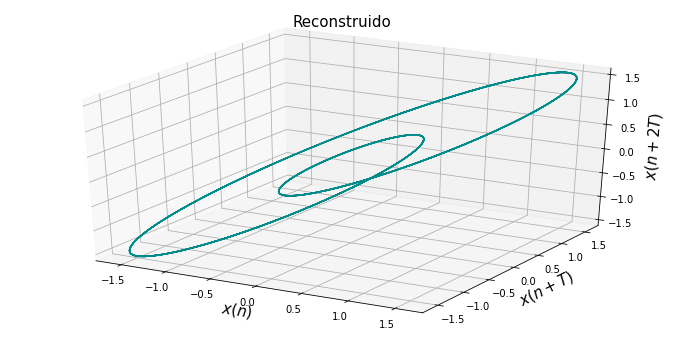

In [147]:
fig= plt.figure(figsize=(12,6))
ax = plt.axes(projection="3d")
plt.title("Reconstruido", fontsize=15)
ax.plot3D(x_emb, y_emb, z_emb, 'darkcyan')
ax.set_xlabel(r"$x(n)$", fontsize=15)
ax.set_ylabel(r"$x(n+T)$", fontsize=15, labelpad=5)
ax.set_zlabel(r"$x(n+2T)$", fontsize=15, labelpad=5)
plt.show()


## 2) Flujos Complejos: Oscilador No-lineal Forzado


En esta sección vamos a ver la dinamica compleja que puede generarse a aprtir de forzar periódicamente un oscilador no lineal. Vamos a trabajar con el oscilador de Duffing:

$\ddot{x}+\delta \dot{x} + \alpha x + \beta x^{3} = \gamma cos(\omega t)$

con

$\alpha=-1$

$\beta = 1$

$\delta=0.1$

$\gamma=0.35$

Vamos a escribir el oscilador como un sistema dinámico autónomo haciendo el reemplazo $\theta=\omega t$. Esto nos permitirá integrarlo facilmente utilizando `odeint`.

In [72]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

global alfa
global beta
global delta
global gamma
global w

# Parametros del oscilador:
alfa = -1
beta = 1
delta = 0.1
gamma = 0.35

def duffing(v, t):
    x, y, tita = v[0],v[1],v[2]
    
    dx = y
    dy = - delta * y - alfa * x - beta * x**3 + gamma * np.cos(tita)
    dtita = w
    
    return [dx, dy, dtita]

### 2.1) Caso 1: Siguiendo al Forzante

Vamos a analizar un primer caso, donde el valor de frecuencia del forzante es $\omega = 1.6$.

In [73]:
# Caso 1:
w = 1.6

T = 2*np.pi / w
frecu = 1/T
print('Frecuencia del forzante: ',frecu,'Hz')

# Integramos
dt = 0.05
tiempo = np.arange(0,15000 * T,dt)
x0 = [1,1,0]
sol = odeint(duffing,x0,tiempo)
# Quitamos el transitorio
transitorio = 5000
x, y, tita = sol[transitorio:,0], sol[transitorio:,1], sol[transitorio:,2]
# Definimos el Forzante
forzante = np.cos(tita)


Frecuencia del forzante:  0.25464790894703254 Hz


Si observamos como lucen en el espacio de fases $x(t)$ y $\dot{x}(t)$, podemos notar que la solución del sistema se encuetra en un ciclo límite:

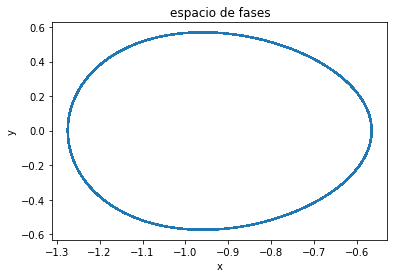

In [74]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('espacio de fases')
plt.show()

Text(0.5, 0, 'Tiempo')

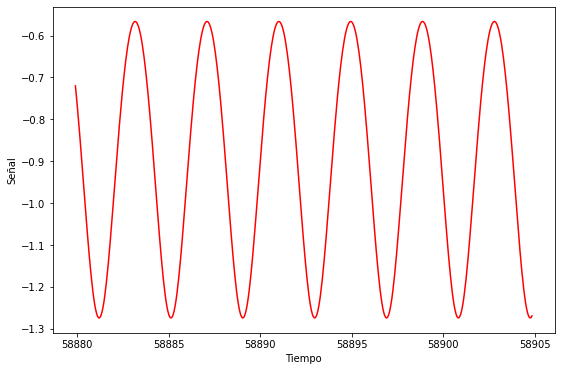

In [75]:
# ploteo x(t)
plt.figure(figsize=(9,6))
plt.plot(tiempo[-500:],x[-500:], label='Señal',color='r') # segnial
plt.ylabel('Señal')
plt.xlabel('Tiempo')

x(t) es una senial periodica, no esta muy claro cual es su periodo.

Analicemos el espectro de la señal $x(t)$. Para eso, urilizaremos la funcion para calcular la transformada rápida de fourier que trae la librería numpy: `np.fft.rfft()`, [acá la documentación](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html).

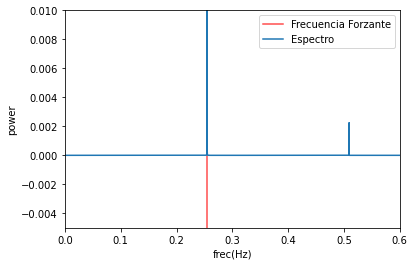

In [76]:
# Calculamos la transformado de Fourier de la señal
fourier_transform = np.fft.rfft(x) # parte real de la transformada de fourier
abs_fourier_transform = np.abs(fourier_transform)
power_spectrum = np.square(abs_fourier_transform)

# Normalizamos y quitamos el valor correspondiente al 0 de frecuencia (offset)
power_spectrum = power_spectrum[1:]
power_spectrum = power_spectrum/np.sum(power_spectrum)
frequency = np.linspace(0, 1/(2*dt), len(power_spectrum)+1)
frequency = frequency[1:]

# Ploteamos el espectro y una linea vertical roja donde esta la frecuencia del Forzante
plt.axvline(x=frecu,color='red',alpha=0.7, label='Frecuencia Forzante')
plt.plot(frequency, power_spectrum, label='Espectro')
plt.xlabel('frec(Hz)')
plt.ylabel('power')
plt.xlim(0,0.6)

# plt.ylim(-0.05,1)
plt.ylim(-0.005,0.01)
plt.legend()
plt.show()

**Tengo un maximo en la frecuencia del forzante y otro maximo con altura mas chica en dos veces la frecuencia del forzante. Este supra-armonico aparece por la no linealidad del problema. Si pongo beta=0, el sistema es lineal y ahi no aparece el supraarmonico.**

Se puede observar facilmente que la frecuencia prdominante en la señal coincide con la del forzante. Al igual que en un oscilador lineal, en este caso el sistema sigue 1 a 1 la frecuencia del forzante.

**Observación:** Si cambian la escala en el eje y del gráfico, verán que también aparece una componente en la componente correspondiente a 2 veces la frecuencia del forzante. Esto es lo que se llama un armónico de la frecuencia fundamental, aparecen en multiplos enteros de la frecuencia fundamental. La proporción entre estos armónicos son los que determinan la forma de la señal periódica (si tengo unicamente un pico en la fundamental, estaríamos en el caso de una sinusoidal pura).

Si calculamos el máximo del espectro, veremos que coincide con la frecuencia del forzante:

In [78]:
maxi = frequency[np.argmax(power_spectrum)]
print('Frecuencia correspondiente al máximo =', maxi,'Hz')
print('Frecuencia del forzante: ',frecu,'Hz')

Frecuencia correspondiente al máximo = 0.25464198217028755 Hz
Frecuencia del forzante:  0.25464790894703254 Hz


Finalmente, si graficamos en función del tiempo, podemos ver que el sistema se engancha (con alguna fase) a la frecuencia del forzante :

Text(0.5, 0, 'Tiempo')

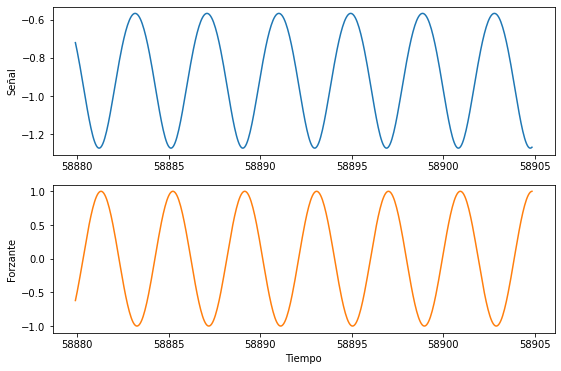

In [81]:
plt.figure(figsize=(9,6))
plt.subplot(211)
tiempo_sin_transi=tiempo[transitorio:]
plt.plot(tiempo[-500:],x[-500:], label='Señal',color='C0') 
plt.ylabel('Señal')
plt.subplot(212)
plt.plot(tiempo[-500:],forzante[-500:], label='Forzante',color='C1')
plt.ylabel('Forzante')
plt.xlabel('Tiempo')


En este caso tenemos un comportamiento muy similar al de un sistema lineal. La señal y el forzante esta en contrafase

Text(0.5, 0, 'Tiempo')

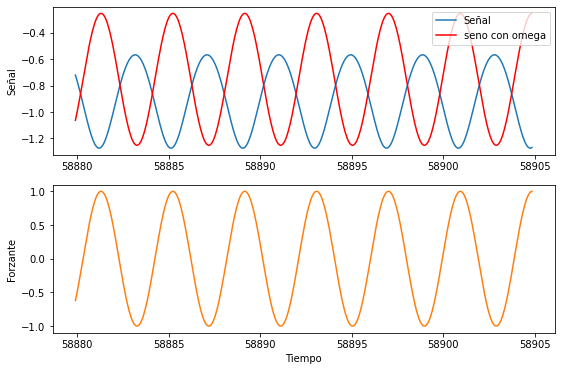

In [88]:
plt.figure(figsize=(9,6))
plt.subplot(211)
tiempo_sin_transi=tiempo[transitorio:]
plt.plot(tiempo[-500:],x[-500:], label='Señal',color='C0') # segnial
plt.plot(tiempo[-500:], 0.5*np.cos(w*tiempo[-500:])+x[0], label="seno con omega",color='r') #seno con frecuencia omega (la del forzante) y un offset
plt.ylabel('Señal')
plt.legend()
plt.subplot(212)
plt.plot(tiempo[-500:],forzante[-500:], label='Forzante',color='C1')
plt.ylabel('Forzante')
plt.xlabel('Tiempo')

### 2.2) Caso 2: Subarmónicos

Volvamos a analizar el sistema de la misma forma que lo hicimos en el caso 1, pero esta vez con un valor de frecuencia del forzante $\omega = 1.35$:

In [142]:
# Caso 2
w = 1.35

T = 2*np.pi / w
frecu = 1/T
print('Frecuencia del forzante: ',frecu,'Hz')

# Integramos
dt = 0.05
tiempo = np.arange(0,15000 * T,dt)
x0 = [1,1,0]
sol = odeint(duffing,x0,tiempo)

# Quitamos el transitorio
transitorio = 5000
x, y, tita = sol[transitorio:,0], sol[transitorio:,1], sol[transitorio:,2]
# Definimos el Forzante
forzante = np.cos(tita)

Frecuencia del forzante:  0.21485917317405873 Hz


Si observamos el diagrama de fases, podemos notar que el sistema se encuentra en un ciclo límite.

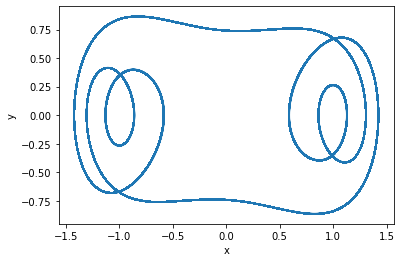

In [90]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show() # ciclo limite ?

Recuerden que este es un sistema no autónomo, por lo tanto las "intersecciones" en este diagrama se dan a distintos tiempos. Si agregamos la dimension temporal:

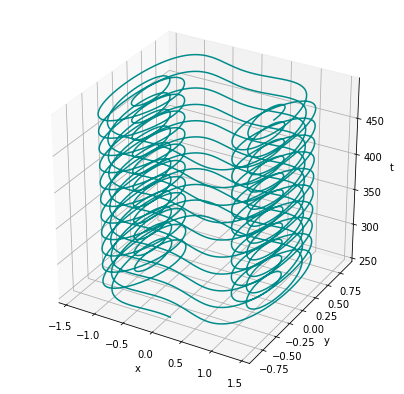

In [91]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.plot3D(x[0:5000], y[0:5000],tita[0:5000] / w, 'darkcyan')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('t')
plt.show()

Veamos el espectro de $x(t)$:

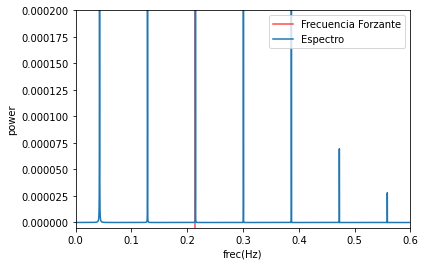

In [143]:
# Calculamos la transformado de Fourier de la señal
fourier_transform = np.fft.rfft(x)
abs_fourier_transform = np.abs(fourier_transform)
power_spectrum = np.square(abs_fourier_transform)

# Normalizamos y quitamos el valor correspondiente al 0 de frecuencia (offset)
power_spectrum = power_spectrum[1:]
power_spectrum = power_spectrum/np.sum(power_spectrum)
frequency = np.linspace(0, 1/(2*dt), len(power_spectrum)+1)
frequency = frequency[1:]

# Ploteamos el espectro y una linea vertical roja donde esta la frecuencia del Forzante
plt.axvline(x=frecu,color='red',alpha=0.7, label='Frecuencia Forzante')
plt.plot(frequency, power_spectrum, label='Espectro')
plt.xlabel('frec(Hz)')
plt.ylabel('power')
plt.xlim(0,0.6)

plt.ylim(-0.000005,0.0002)
plt.legend()
plt.show()

In [99]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(power_spectrum,height=0.0005)
maxi=frequency[peaks]
maxi[1:]-maxi[:-1]

array([0.08595062, 0.08593624, 0.08595062, 0.08593624])

In [104]:
frecu/0.08595062 # los picos son multiplos 2.5 de la frecuencia del forzante
frequency[peaks]/frecu # los picos corresponden a 1/5 frecu_forzante, 3/5 frecu_forzante, 5/5 frecu_forzante, 7/5 frecu_forzante, 9/5 frecu_forzante

array([0.20000955, 0.60009557, 1.00011467, 1.40020069, 1.8002198 ])

**los picos corresponden a 1/5 frecu_forzante, 3/5 frecu_forzante, 5/5 frecu_forzante, 7/5 frecu_forzante, 9/5 frecu_forzante**

Esto es algo que no poríamos encontrar nunca en un sistema con dinámica lineal: **la respuesta del sistema tiene un periodo mas grande (subarmonicos, frecuencias mas chicas) que el forzante que lo esta excitando.**

Estas frecuencias exitadas que se encuentran por debajo de la frecuencia del forzante se llaman subarmónicos. Es una diferencia fundamental entre la respuesta de los sistemas lineales y los no lineales (o, como decía [Stanislaw Ulam](https://www.nature.com/articles/432455a), de los "non-elephant animals").

Si calculamos la freceuncia del primer pico:



In [36]:
maxi = frequency[np.argmax(power_spectrum)]
print('Frecuencia correspondiente al máximo =', maxi,'Hz')

Frecuencia correspondiente al máximo = 0.042968121075511186 Hz


podemos luego investigar su cociente con respector a la frecuencia fundamental:

In [37]:
print('Frec Forzante / Frec Sistema =', frecu/maxi)

Frec Forzante / Frec Sistema = 5.000432129589054


vemos que el sistema se está enganchando en una relacion 5 a 1 con el forzante. 

Podemos observar esta misma relación en el gráfico de $x(t)$ y el forzante en función del tiempo.

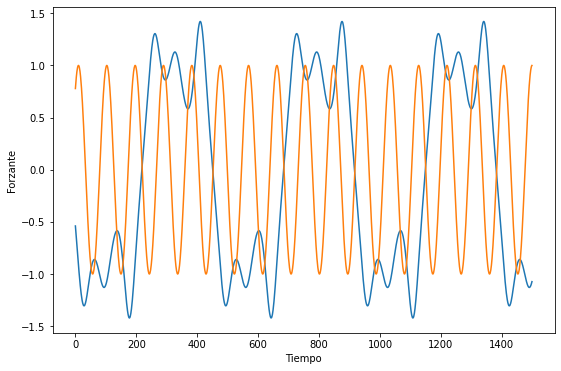

In [39]:
plt.figure(figsize=(9,6))
#plt.subplot(211)
plt.plot(x[-1500:], label='Señal',color='C0')
plt.ylabel('Señal')
#plt.subplot(212)
plt.plot(forzante[-1500:], label='Forzante',color='C1')
plt.ylabel('Forzante')
plt.xlabel('Tiempo')
plt.show()

**La frecuencia del forzante es 5 veces mas grande que una de las frecuencias de la segnial (la mas chica y la que predomina). Podemos ver que entre un periodo de la segnial (celeste) entran 5 periodos del forzante (naranja).** 

### 2.3) Caso 3: Caos

Volvamos a analizar el sistema de la misma forma que lo hicimos en el caso 1 y 2, pero esta vez con un valor de frecuencia del forzante $\omega = 1.4$:

In [101]:
# Caso 3
w = 1.4

T = 2*np.pi / w
frecu = 1/T
print('Frecuencia del forzante: ',frecu,'Hz')

# Integramos
dt = 0.05
tiempo = np.arange(0,15000 * T,dt)
x0 = [1,1,0]
sol = odeint(duffing,x0,tiempo)

# Quitamos el transitorio
transitorio = 5000
x, y, tita = sol[transitorio:,0], sol[transitorio:,1], sol[transitorio:,2]
# Definimos el Forzante
forzante = np.cos(tita)

Frecuencia del forzante:  0.22281692032865347 Hz


Si observamos el diagrama de fases, podemos percibir que el sistema no parece estabilizarse en un ciclo límite.

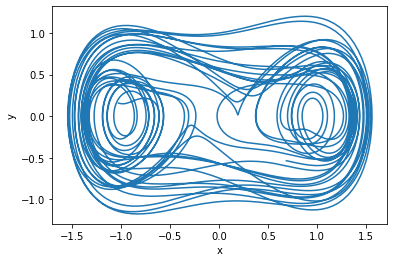

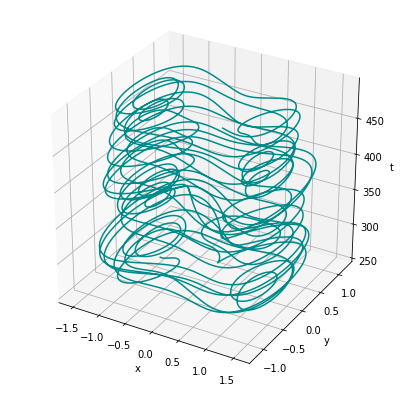

In [102]:
plt.plot(x[0:5000],y[0:5000])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.plot3D(x[0:5000], y[0:5000],tita[0:5000] / w, 'darkcyan')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('t')
plt.show()

Como vieron en la teórica, esto es lo que llamamos una solución caótica del sistema y, a pesar de estar acotada en el espacio, no se acerca a un ciclo límite ni a un punto fijo.

**En este caso la solución proyectada en $x(t)$ no será una señal periódica, pero igualmente podemos inspeccionar su espectro:** 

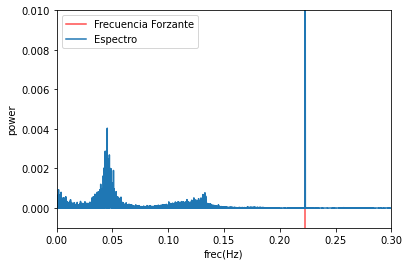

In [103]:
# Calculamos la transformado de Fourier de la señal
fourier_transform = np.fft.rfft(x)
abs_fourier_transform = np.abs(fourier_transform)
power_spectrum = np.square(abs_fourier_transform)

# Normalizamos y quitamos el valor correspondiente al 0 de frecuencia (offset)
power_spectrum = power_spectrum[1:]
power_spectrum = power_spectrum/np.sum(power_spectrum)
frequency = np.linspace(0, 1/(2*dt), len(power_spectrum)+1)
frequency = frequency[1:]

# Ploteamos el espectro y una linea vertical roja donde esta la frecuencia del Forzante
plt.axvline(x=frecu,color='red',alpha=0.7, label='Frecuencia Forzante')
plt.plot(frequency, power_spectrum, label='Espectro')
plt.xlabel('frec(Hz)')
plt.ylabel('power')
plt.xlim(0,0.3)

plt.ylim(-0.001,0.01)
plt.legend()
plt.show()

Como se puede observar, en este caso la señal es epectralmente compleja. El máximo del espectro coinide con la frecuencia del forzante, pero notemos que también aparecen frecuencias relevantes en $1/5$ y $3/5$ del forzante.

**Reflexionar:** Si pensamos en terminos del espacio de fases ¿Que significarán estos picos en $1/5$ y $3/5$? Noten que resulta sugerente el valor $1/5$ (ya había aparecido en la sección anterior).

Finalmente, podemos graficar la señal en función del tiempo y explicitar su aperiodicidad:

**preguntar que significan los numero 1/5, 3/5, etc**

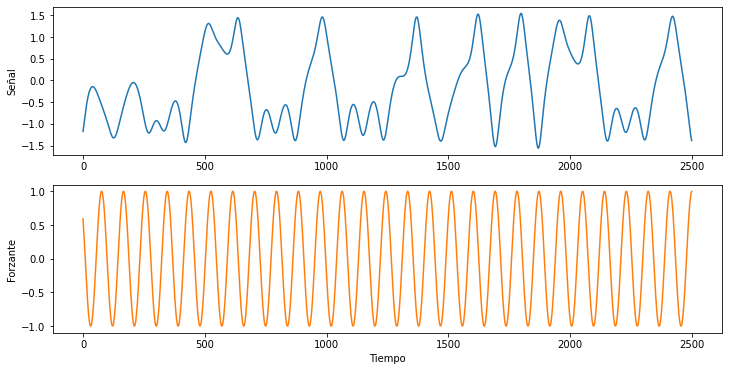

In [105]:
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(x[-2500:], label='Señal (no es periodica)',color='C0')
plt.ylabel('Señal')
plt.subplot(212)
plt.plot(forzante[-2500:], label='Forzante',color='C1')
plt.ylabel('Forzante')
plt.xlabel('Tiempo')
plt.show()

**Ejercicio:** 
 
*   Simular un sistema de Rossler igual al que usamos en el Notebook anterior (clase 4).
*   Analizar el espectro de fourier de la solución proyectada al eje $x$. ¿A qué corresponden los picos que observas en esta señal?


In [148]:
import numpy as np
import matplotlib.pyplot as plt

def ecuaciones(x,y,z, a=0.1, b=0.1, c=14):
    '''
    Recibe:
       x, y: Variables del sistema
       param: Lista con los parámetros del sistema
    Devuelve:
       x_dot, y_dot: valor de las derivadas para cada variable
    '''
    # ecuaciones de rossler
    x_dot = 1*(-y - z)
    y_dot = 1*(x + a*y)
    z_dot = 1*(b + z*(x - c))

    return x_dot, y_dot, z_dot


def integrar_ecuaciones(total_time,dt,X0):

    '''
    Recibe:
       total_time: Tiempo total del integración
       dt: Paso temporal (h del método)
       X0: Lista con [x0,y0] valores iniciales de la integración
       params: Lista con los parámetros del sistema
    Devuelve:
       x_s, y_s: Vectores con las soluciones para ambas variables
       num_steps: Numero de pasos de integracion
    '''

    num_steps = int(np.divide(total_time,dt))

    # Empty vectors
    xs = np.empty(num_steps)
    ys = np.empty(num_steps)
    zs = np.empty(num_steps)

    # Set initial values
    xs[0], ys[0], zs[0] = X0

    # Empty vectors
    x_dot = np.empty(num_steps)
    y_dot = np.empty(num_steps)
    z_dot = np.empty(num_steps)

    # Set initial derivatives values
    x_dot[0], y_dot[0], z_dot[0] = ecuaciones(xs[0], ys[0], zs[0])

    # Integramos con método de Euler
    for i in range(num_steps-1):
        x_dot[i], y_dot[i], z_dot[i] = ecuaciones(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot[i] * dt)
        ys[i + 1] = ys[i] + (y_dot[i] * dt)
        zs[i + 1] = zs[i] + (z_dot[i] * dt)

    return xs, ys, zs, num_steps

In [149]:
# Simulamos los datos
total_time = 5000
dt = 0.005
X0 = (10, 10, 0)

xs, ys, zs, num_steps = integrar_ecuaciones(total_time,dt,X0)

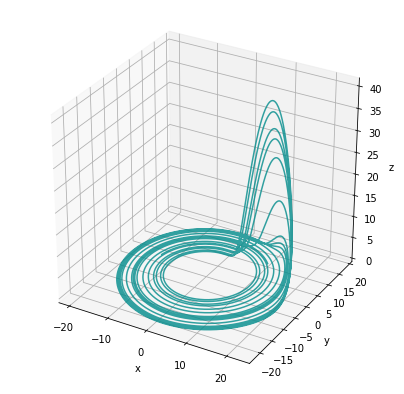

In [150]:
# Numero de puntos a graficar
N = 20000

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.plot3D(xs[0:N],ys[0:N],zs[0:N], 'darkcyan', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Text(0.5, 0, 'Tiempo')

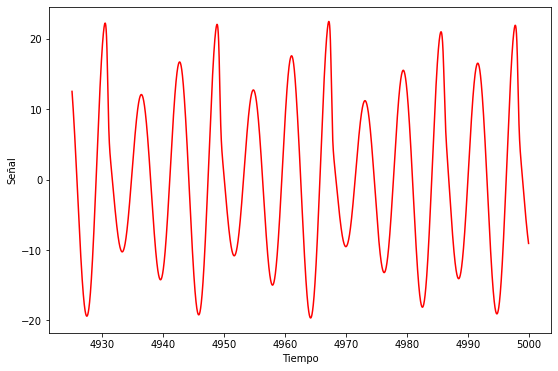

In [151]:
# ploteo x(t)
plt.figure(figsize=(9,6))
plt.plot(np.linspace(0,5000,num_steps)[-15000:],xs[-15000:], label='Señal',color='r') # segnial
plt.ylabel('Señal')
plt.xlabel('Tiempo')

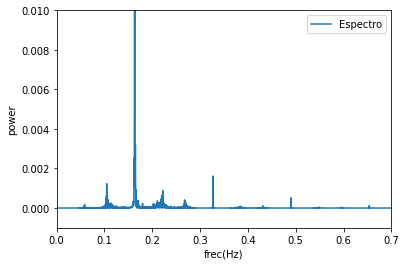

In [152]:
# Calculamos la transformado de Fourier de la señal
fourier_transform = np.fft.rfft(xs)
abs_fourier_transform = np.abs(fourier_transform)
power_spectrum = np.square(abs_fourier_transform)

# Normalizamos y quitamos el valor correspondiente al 0 de frecuencia (offset)
power_spectrum = power_spectrum[1:]
power_spectrum = power_spectrum/np.sum(power_spectrum)
frequency = np.linspace(0, 1/(2*dt), len(power_spectrum)+1)
frequency = frequency[1:]

# Ploteamos el espectro 
plt.plot(frequency, power_spectrum, label='Espectro')
plt.xlabel('frec(Hz)')
plt.ylabel('power')
plt.xlim(0,0.7)

plt.ylim(-0.001,0.01)
#plt.ylim(-0.00001,0.001)
plt.legend()
plt.show()

In [136]:
from scipy.signal import find_peaks
#peaks, _ = find_peaks(power_spectrum,height=0.005)
peaks, _ = find_peaks(power_spectrum,height=0.0003, distance=100)
maxi=frequency[peaks]
maxi[1:]-maxi[:-1] # estan bastante equispaciados los picos de rossler
#maxi

array([0.0586, 0.0586, 0.0456, 0.0594, 0.1634])

In [153]:
maxi_maxi = frequency[np.argmax(power_spectrum)]
print('Frecuencia correspondiente al máximo =', maxi_maxi,'Hz')

Frecuencia correspondiente al máximo = 0.16340000000000002 Hz


**estan bastante equispaciados los picos de rossler**

In [154]:
#Reconstruimos el espacio de fases
#Damos el paso del retraso temporal tau
tau= dt*10000  # algun multiplo del dt 
tau=1/float(maxi_maxi)

#En terminos de numero de puntos:
T = int(tau/dt)
print("El retraso temporal utilizado es:"+str(tau)+"s")
print("El retraso en número de puntos es:", T)

#Hacemos el embedding de dimension 2:
#Definimos las listas donde guardamos la componente x e y del embedding
x_emb = []
y_emb = []
z_emb = []

for k in range(len(xs)-2*T):
  x_emb.append( xs[k] )
  y_emb.append( xs[k+T] )
  z_emb.append( xs[k+2*T] )

El retraso temporal utilizado es:6.119951040391676s
El retraso en número de puntos es: 1223


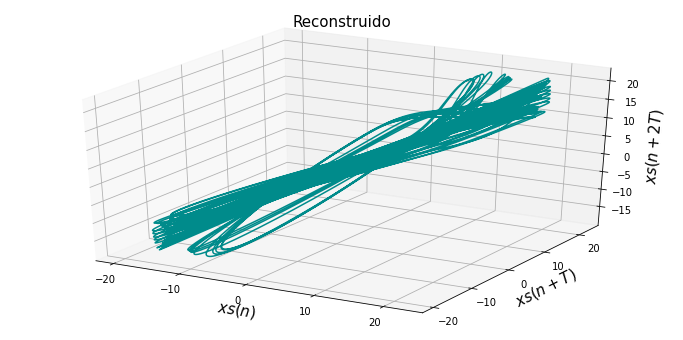

In [155]:
fig= plt.figure(figsize=(12,6))
ax = plt.axes(projection="3d")
plt.title("Reconstruido", fontsize=15)
ax.plot3D(x_emb[-50000:], y_emb[-50000:], z_emb[-50000:], 'darkcyan')
ax.set_xlabel(r"$xs(n)$", fontsize=15)
ax.set_ylabel(r"$xs(n+T)$", fontsize=15, labelpad=5)
ax.set_zlabel(r"$xs(n+2T)$", fontsize=15, labelpad=5)
plt.show()